In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\lok31\Desktop\ML\Day 13\placement.csv")

In [4]:
df.head(2)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0


In [5]:
df=df.iloc[:,1:]

In [6]:
df.head(2)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
import matplotlib.pyplot as plt

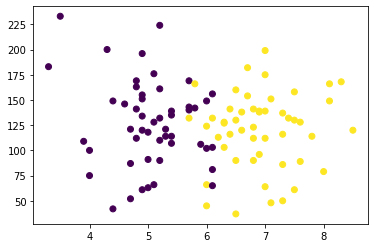

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
X=df.iloc[:,:-1]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y=df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [21]:
X_train

,cgpa,iq
77,7.3,50.0
88,4.4,149.0
71,6.1,132.0
0,6.8,123.0
34,4.8,163.0
...,...,...
96,4.4,42.0
80,4.9,196.0
57,6.5,130.0
33,6.0,149.0


In [22]:
X_test

,cgpa,iq
87,5.7,132.0
36,5.7,140.0
76,4.9,155.0
41,5.4,114.0
65,8.1,166.0
13,6.4,116.0
32,7.0,139.0
37,8.1,149.0
12,5.4,139.0
83,7.5,130.0


In [23]:
y_train

77    1
88    0
71    1
0     1
34    0
     ..
96    0
80    0
57    1
33    0
64    1
Name: placement, Length: 90, dtype: int64

In [24]:
y_test

87    1
36    0
76    0
41    0
65    1
13    1
32    1
37    1
12    0
83    1
Name: placement, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [33]:
X_train

array([[ 1.20090351, -1.74407707],
       [-1.36613839,  0.65476929],
       [ 0.13867927,  0.24284617],
       [ 0.75831008,  0.02476923],
       [-1.01206364,  0.99400009],
       [-1.72021313, -0.53253851],
       [-0.74650758,  1.30900011],
       [-0.48095153,  0.31553849],
       [ 0.84682876,  0.3882308 ],
       [ 1.64349694, -0.19330771],
       [ 0.84682876,  0.41246157],
       [ 0.13867927, -1.3806155 ],
       [ 2.08609037,  1.11515394],
       [ 0.13867927, -0.45984619],
       [ 0.5812727 ,  0.3882308 ],
       [-0.48095153, -0.36292311],
       [-1.18910101,  0.58207697],
       [ 1.20090351, -0.14484617],
       [ 1.02386613, -1.79253862],
       [-0.92354496,  0.70323083],
       [ 1.37794088, -1.47753859],
       [ 0.13867927,  0.82438469],
       [ 1.02386613,  0.70323083],
       [-1.80873182, -0.31446157],
       [ 1.28942219,  0.24284617],
       [-1.10058233, -0.84753853],
       [-0.83502627, -0.75061545],
       [-0.6579889 , -0.77484622],
       [ 1.82053431,

In [35]:
X_test=scaler.fit_transform(X_test)

In [36]:
X_test

array([[-0.64203874, -0.39056673],
       [-0.64203874,  0.13018891],
       [-1.35541511,  1.10660574],
       [-0.90955488, -1.56226693],
       [ 1.49809039,  1.82264475],
       [-0.01783441, -1.43207802],
       [ 0.51719787,  0.06509446],
       [ 1.49809039,  0.71603901],
       [-0.90955488,  0.06509446],
       [ 0.96305811, -0.52075564]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf=LogisticRegression()

In [40]:
#model Training
clf.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred=clf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.8

In [50]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

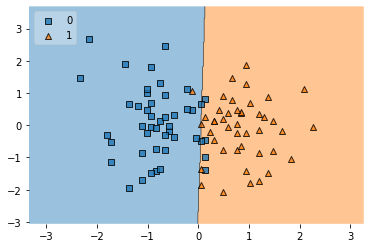

In [51]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [52]:
import pickle

In [53]:
pickle.dump(clf,open('model.pkl','wb'))